# 파이프라인 구축 및 하이퍼파라미터 튜닝

- 머신러닝 절차 ( 전체 공정 5단계 내에서 )
  - 알고리즘 선정
  - 학습, 테스트용 데이터 준비
  - 학습
    - 1차적인 기본 학습 진행
    - 운영 : 온라인 학습, 배치학습 등등....
      - 알고리즘을 주기적으로 교체(자동, 반자동, 수동)
      - 실시간으로 반영되면서 교체(실시간온라인, 주단위로 특정일에 갱신)
      - 롤백이 가능
  - 예측
  - 성능평가
    - 목표치에 도달하기 위해 -> 정확도를 올린다, 손실값을 줄인다 등등
    - 판단 기준 => 분류, 회귀, 비지도학습, 강화학습 등에 따라 달라진다
    - **성능을 높이기 위해서 => 파이프라인, 교차검증, 하이퍼파라미터튜닝**
      => *알고리즘을 선정*
    - 성능평가 방법 => 분류, 회귀, 비지도학습, 강화학습 등에 따라 달라진다
      => 분류 : 혼동행렬(오차행렬), ROC 커브, AUC 값 등등 비교
      => 회귀 : 지표로 판단, 손실함수값(평균제곱근 오차 값을 이용)
  - 알고리즘 덤프(향후 시스템통합에 사용할 수 있게 구성)


# 단일 알고리즘 적용하여 머신러닝 프로세스 진행

In [0]:
# 1. 모듈가져오기
from sklearn.svm import SVC
from sklearn.datasets import  load_breast_cancer
from sklearn.model_selection import  train_test_split
# 머신러닝 모델링 : 75(=50(훈련):25(검증)):25
# 통계적 모델링   : 80:20

In [0]:
# 2. 데이터 확보, 수집 ( 생략, 제공된다)
cancer = load_breast_cancer()

In [0]:
# 3. 데이터 준비
# 데이터의 기초적인 정보, 통계정보를 살펴보고 기본 통찰을 획득
# 준비 -> 품질향상, 학습에 필요한 형태로 구성
type(cancer), dir(cancer), print(cancer.DESCR[:50])

.. _breast_cancer_dataset:

Breast cancer wisconsi


(sklearn.utils.Bunch,
 ['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names'],
 None)

In [0]:
# 데이터의 볼륨 : 데이터는 569개, 특성 30개(독립변수)
cancer.data.shape

(569, 30)

In [0]:
# 종속변수, 암이냐? 아니냐?
cancer.target.shape, cancer.target[:5]

((569,), array([0, 0, 0, 0, 0]))

In [0]:
# '악성': 0, '양성':1
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
# 데이터 분석 (생략)

In [0]:
# 5. 예측 모델링 구축
# 데이터가 특성과 정답을 가지고 있으므로, 지도학습>분류

In [0]:
# 5-1. 알고리즘 선정 (임의 선정)
clf = SVC()

In [0]:
# 5-2. 학습, 테스트용 데이터 준비
# 독립변수와 종속변수의 데이터 수는 일치, 차원은 1개 차이가 나고
# return : 훈련용 독립변수, 테스트용 독립변수, 훈련용 정답, 테스트용 정답
X_train, X_test, y_train, y_test= train_test_split( 
    cancer.data, # 독립변수, 30개 특성에 대한 개별값들, 2-ndarray
    cancer.target, # 종속변수, 악성(0), 양성(1), 1-ndarray
    random_state=0,# 난수의 seed를 고정함으로써, 매번 돌릴때마다, 
                   # 데이터가 섞이는 순서가 동일하다 => 실험환경을 통제한다
                   # 오늘, 내일, 내년 등 해도 항상 동일한 결과를 가져온다
                   # 사용하지 않으면 통상 현재시간을 seed로 사용
    test_size=0.25 # 테스트 데이터는 25%를 책정한다. 사용하지 않아도 기본값이 0.25
 )


In [0]:
# 훈련용 데이터가 테스트용 데이터의 약 3배의 볼륨을 가진다
X_train.shape, X_test.shape, (143*3)

((426, 30), (143, 30), 429)

In [0]:
# 5-3. 학습시킨다, 이런 데이터에 대해 훈련되었다
# clf : 분류기 => 분류 알고리즘(여기서는 사용한 제품이 SVC)
clf.fit( X_train, y_train )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# 5-4. 예측해라. 한번도 접하지 않은 데이터를
predict = clf.predict( X_test )
# 예측값은 0 아니면 1
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [0]:
# 5-5. 성능 평가를 수행 (분류, 회귀, 비지도, 강화 => 방법이 바뀐다)
# 분류 -> 혼동(오차) 행렬 -> 정밀도, 재현율, 정확도, f1-score, AUC, ROC
# 정확도만 일단 살펴보겠다
from sklearn import metrics

In [0]:
# (실제 정답, 알고리즘이 예측한 값)
metrics.accuracy_score( y_test, predict )

0.9370629370629371

In [0]:
# 예측 후 평가를 바로 진행 
clf.score( X_test, y_test )

0.9370629370629371

# 정확도를 높이기 위한 조치



## 데이터의 양 추가(여기서는 불가)

## 데이터 품질 향상(전처리기를 이용한 정규화 처리)

- 현재 정확도는 0.937% 이다
- 만약 현 site의 목표 임계치가 96% 라면 현 알고리즘을 개선, 교체, 데이터를 증설 등의 조치가 필요하다
- 추가 데이터 유입은 불가
- 품질 향상을 하는 방향으로 진행-> 3단계 조치사항의 목표
  - 전처리 (preprocessing) => 정규화, 수치 조정 등의 진행

In [0]:
# 컬럼 간 데이터의 편차가 비교적 크다()=> 정규화를 통해서
# 0~1 사이로 구성, 최솟값을 0 최댓값을 1로 둔다면
# MinMaxScaler 
X_train[]

SyntaxError: ignored

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler().fit( X_train )
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
# 스케일러를 통해서 변환
X_train_scaled = scaler.transform( X_train )
X_train_scaled

array([[0.23044157, 0.32157676, 0.21940433, ..., 0.31484671, 0.30277942,
        0.09858323],
       [0.20062473, 0.42116183, 0.19452699, ..., 0.06965208, 0.34042973,
        0.06677161],
       [0.62232003, 0.76929461, 0.60403566, ..., 0.56079917, 0.19850187,
        0.07431457],
       ...,
       [0.11619102, 0.35726141, 0.11077327, ..., 0.17402687, 0.17524147,
        0.17263545],
       [0.12963226, 0.35311203, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.59004149, 0.21235575, ..., 0.33251808, 0.10782574,
        0.21172767]])

- 알고리즘을 새로 만들어서 새로운 데이터로 다시 절차 수행
  - 단, 스케일러 생성시 사용했던 재료가, 전체 데이터에 대한 부분이 아닌,
  - 훈련 데이터만 가지고 만든 스케일이라서, 테스트 데이터하고는 적합하지 않다
  - 스케일러 생성이나 적용시 시점의 조정이 필요한 것으로 보인다
  - 파이프라인으로 해결 가능!!

In [0]:
# 5-1. 알고리즘 선정 (임의 선정)
clf2 = SVC()
# 5-2. 학습, 테스트용 데이터 준비
# 단, 스케일러의 생성재료 X_train
X_test_scaled = scaler.transform(X_test) 
# 5-3. 학습시킨다, 이런 데이터에 대해 훈련되었다
clf2.fit( X_train_scaled, y_train )
# 5-4. 예측해라. 한번도 접하지 않은 데이터를
predict = clf2.predict( X_test_scaled )
# 5-5. 성능 평가를 수행 (분류, 회귀, 비지도, 강화 => 방법이 바뀐다)
clf2.score( X_test_scaled, y_test )

0.972027972027972

## 하이퍼파라미터 튜닝 적용

- 머신러닝 모형이 완성(알고리즘을 선정하고 나서)되고, 알고리즘 선정간에 적용
- 매개변수 최적화를 통해서 예측 성능을 극대화 한다

### 관련 함수나 클래스

- validatoin_curve : 단일 하이퍼 파라미터 최적화 도구
- **GridSearchCV : 복수개의 알고리즘의 하이퍼파라미터 최적화 도구**
- ParameterGrid : 복수개의 알고리즘의 하이퍼파라미터 최적화 도구

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# SVC 알고리즘에 대한 파라미터 값 범주( 어디서부터 ~ 어디까지 ) 지정
# 기본값을 센터에 두고 전후를 나열
param_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

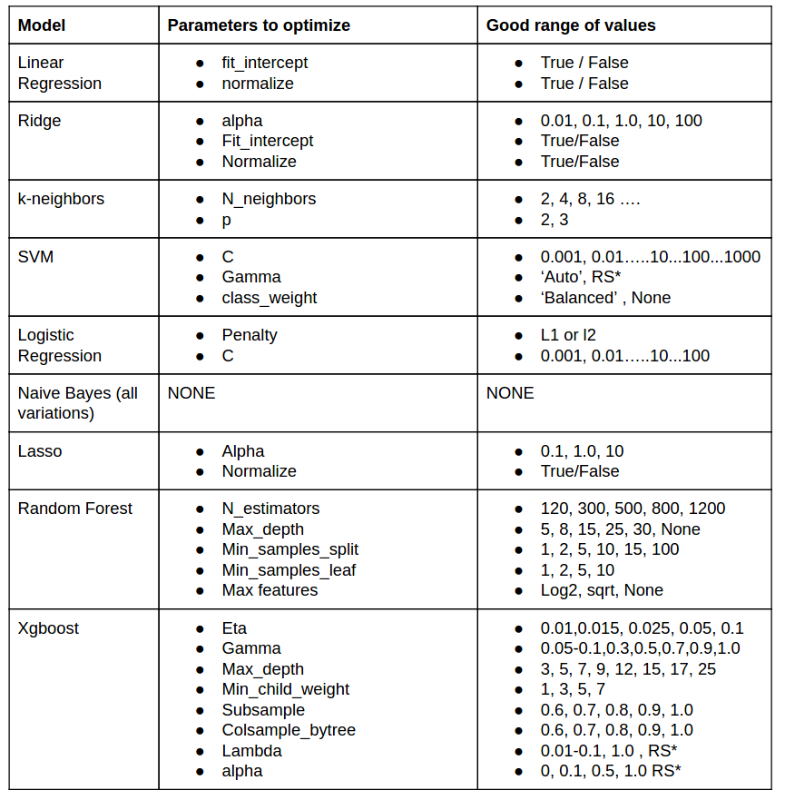

In [0]:
# from IPython.display import Image
# Image('/content/매개변수.png', width='500')
# 알고리즘 별 최적화 파라미터 목록 및 값 샘플

In [0]:
# 교차 검증을 통해서 파라미터 최적화 값을 확인
# cv : 교차 검증수(폴드) 지정
# cv=5 => 폴드 수가 5개, 5세트를 지정한다, 이 중 한세트가 검증용 데이터
grid = GridSearchCV( SVC(), param_grid, cv=5 )

In [0]:
# 훈련
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
# 평가
grid.best_score_

0.9812311901504789

In [0]:
# 최적의 파라미터 조합은
grid.best_params_

{'C': 1, 'gamma': 1}

In [0]:
# 정확도
grid.score( X_test_scaled, y_test )
# 이전단계 값 : 0.972027972027972

0.972027972027972

- 왜 grid.best_score_가 점수가 더 높았을까?

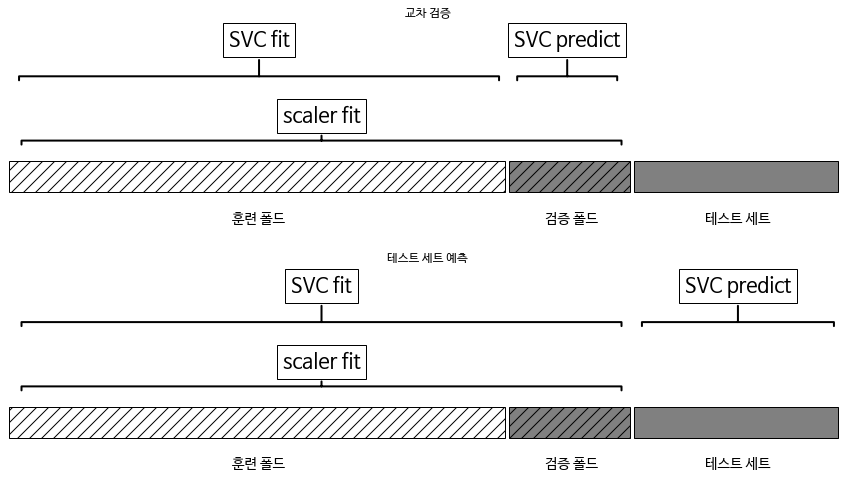

In [0]:
Image('/content/cro.png', width='500')
# 문제점
# 검증폴드의 데이터도 이미 사전에 스케일링이 된거라서,
# 스케일러 입장에서는 이미 접한 데이터가 되고
# 이로 인해 하이퍼파라미터 튜닝을 해봤자 => C=1, gamma=1이라는
# 결과(기본값)가 나와서, 테스트 데이터 예측값이 이전과 동일하다

In [0]:
Image('/content/cro2.png', width='500')
# 그리드서치가 알아서 훈련시 훈련폴드만 스케일 처리를 할수있게
# 구성이 필요하다 => 파이프라인!!

### 파이프라인 구축

- 폴드 문제 해결
- 여러개 알고리즘 비교 혹은 사용
- 하이퍼파라미터 튜닝

In [0]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [0]:
# 생성 방법 비교
# case 1 : 표준방법 => 이름을 직접 부여
pipe_std1 = Pipeline( [ ('scaler', MinMaxScaler()),
                        ('classifier', SVC())   
                      ] )
# case 2 : 약식, 간소화 방법 => 이름을 알아서 부여
# 대상 클래스 이름을 다 소문자로 변환하여 부여
pipe_std2 = make_pipeline( MinMaxScaler(), SVC() )

In [0]:
pipe_std1

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [0]:
pipe_std2

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

- 실제 적용

In [0]:
# 파이프라인 구축 => 데이터 전처리, 훈련 등의 시퀀스를 정의
pipe = Pipeline( [ ('preprocessing', StandardScaler()),
                        ('classifier', SVC())   
                      ] )

In [0]:
# 하이퍼파라미터 튜닝
param_grid = [
  {
      'preprocessing': [StandardScaler(), MinMaxScaler()],
      'classifier': [SVC()],
      'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
      'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  },
  {
      'preprocessing': [None],
      'classifier': [RandomForestClassifier(n_estimators=100)],
      'classifier__max_features':[1,2,3]
  }
]

In [0]:
# 교차검증 생성
grid = GridSearchCV( pipe, param_grid, cv=5 )

In [0]:
# 훈련
grid.fit( X_train, y_train )

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinki...
                                            

In [0]:
# 최적 파라미터
grid.best_params_

{'classifier': SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'classifier__C': 10,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [0]:
# 최고 점수
grid.best_score_

0.9858823529411765

In [0]:
# 예측 및 평가
grid.score( X_test, y_test )

0.9790209790209791